# **Đề tài: Phân tích, thống kê video thịnh hành trên Youtube**


# 1. Thu thập dữ liệu

## 1.1 Đặt vấn đề
## **Trần Phan Minh Tiến**

    Question 1: Vẽ biểu đồ tròn thể hiện tỷ lệ số lượng video thịnh hành tại 10 quốc gia:
    Hoa Kỳ (US), Canada (CA), Đức (DE), Pháp (FR), Anh (GB), Ấn Độ (IN), Nhật Bản (JP), Hàn Quốc (KR), Mexico (MX), Nga (RU).

    Question 2: Vẽ biểu đồ cột so sánh lượt thích, không thích, lượt xem và bình luận trung bình của các video thịnh hành.
## **Trần Minh Thuận**

    Question 3: Top 7 kênh YouTube có số lượng video thịnh hành nhiều nhất trên toàn cầu

    Question 4: Biểu đồ thể hiện thể loại nội dung trending cho từng quốc gia
## **Hoàng Văn Đức**

    Question 5: Vẽ biểu đồ cột thể hiện số lượng video thịnh hành theo giờ đăng trong ngày
    
    Question 6: Vẽ biểu đồ đường hoặc cột thể hiện lượt xem trung bình theo từng ngày trong tuần

## 1.2. Import libraries:

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import kagglehub

## 1.3 TẢI DATA XUỐNG TỪ KAGGLEHUB

In [32]:
kaggle_download_path = kagglehub.dataset_download("datasnaek/youtube-new")
print("Path to dataset files:", kaggle_download_path)

Path to dataset files: /home/thuanc177/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115


# 2. Truy cập vào dữ liệu




## 2.1. Đọc dữ liệu từ file

In [33]:
# Khởi tạo tạm thời dict dataframes để chứa các dataframe
dataframes = {}

In [34]:
# Định nghĩa các hàm để tiền xử lí dữ liệu
def read_and_fix_csv(path, fix_columns=None, default_encoding='utf-8', fallback_encoding='ISO-8859-1'):
    try:
        df = pd.read_csv(path, encoding=default_encoding)
    except UnicodeDecodeError:
        df = pd.read_csv(path, encoding=fallback_encoding)

    if fix_columns:
        for col in fix_columns:
            if col in df.columns:
                df[col] = df[col].apply(fix_encoding)

    return df

# Sua lai encoding cho cac cot
def fix_encoding(s):
    try:
        return s.encode('latin1').decode('utf-8')
    except:
        return s  # giữ nguyên nếu không chuyển được

In [35]:
# Tạo dict lưu các DataFrame
country_codes = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
columns_to_fix = ['title', 'channel_title', 'description', 'tags']
for code in country_codes:
    filepath = f"{kaggle_download_path}/{code}videos.csv"
    dataframes[code] = read_and_fix_csv(filepath, fix_columns=columns_to_fix)

## 2.2. Xem thông tin của Dataset

### Đọc ngẫu nhiên 5 dòng dữ liệu của các data set 

In [36]:
dataframes['US'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [37]:
dataframes['CA'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [38]:
dataframes['DE'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [39]:
dataframes['FR'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [40]:
dataframes['GB'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [41]:
dataframes['IN'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [42]:
dataframes['JP'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25,2018-02-06T03:04:37.000Z,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...
1,ohObafdd34Y,18.07.02,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25,2018-02-06T06:08:49.000Z,アシタノワダイ,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...
4,B7J47qFvdsk,18.07.02,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...


In [43]:
dataframes['KR'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [44]:
dataframes['MX'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [45]:
dataframes['RU'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


# 3. Làm sạch dữ liệu

## 3.1. Các bước làm sạch dữ liệu chi tiết

Để đảm bảo chất lượng dữ liệu cho phân tích, chúng ta sẽ thực hiện các bước làm sạch sau cho DataFrame của mỗi quốc gia:

1.  **Kiểm tra tính đầy đủ (Completeness):**
    *   Mục tiêu: Đảm bảo các cột quan trọng không chứa giá trị thiếu (null).
    *   Các cột mục tiêu: `video_id`, `title` (tên video), `channel_title` (tên kênh), và `trending_date` (ngày trending).
    *   Hành động: Loại bỏ các hàng (dòng) có bất kỳ giá trị null nào trong các cột này.

2.  **Kiểm tra tính duy nhất (Uniqueness):**
    *   Mục tiêu: Đảm bảo mỗi video (`video_id`) là duy nhất trong bộ dữ liệu của mỗi quốc gia.
    *   Hành động: Loại bỏ các hàng có `video_id` trùng lặp, chỉ giữ lại bản ghi có ngày trending sớm nhất.

3.  **Kiểm tra tính nhất quán (Consistency):**
    *   Mục tiêu: Đảm bảo dữ liệu tuân theo định dạng và kiểu dữ liệu mong muốn.
    *   **Ngày tháng:** Kiểm tra cột `trending_date` có thống nhất theo định dạng `yy.dd.mm` (năm.ngày.tháng). Chuyển đổi sang kiểu dữ liệu datetime cùng với time zone. Với cột trending date không có time stamp nên mặc định là 00:00 với time zone chuẩn UTC 0. Với cột publish date thì đảm bảo định dạng theo chuẩn đã đề ra, và chuyển đổi nếu cần.
    
4.  **Kiểm tra chuẩn dữ liệu (Validity):**
    *   Mục tiêu: Đảm bảo dữ liệu theo đúng chuẩn định dạng kiểu dữ liệu xuyên suốt cho tất cả các dòng trong cột
    *   **Kiểu dữ liệu số:** Kiểm tra các cột `views` (lượt xem), `likes` (lượt thích), `dislikes` (lượt không thích), `comment_count` (số bình luận) có phải là kiểu số nguyên. Những hàng có giá trị không phải số trong các cột này sẽ được loại bỏ, sau đó các cột này sẽ được chuyển đổi sang kiểu số nguyên.

In [46]:
# Remove rows with null values in essential columns
def clean_completeness(df, country_code):
    print(f"  Kiểm tra tính đầy đủ cho {country_code}:")
    initial_rows = len(df)
    essential_columns = ['video_id', 'title', 'channel_title', 'trending_date']
    
    df_cleaned = df.dropna(subset=essential_columns)
    rows_removed = initial_rows - len(df_cleaned)
    print(f"    - Loại bỏ {rows_removed} hàng thiếu giá trị, còn lại {len(df_cleaned)} hàng")
    return df_cleaned

# Convert data types and remove invalid format rows for datetime columns
def clean_datetime_consistency(df, country_code):
    print(f"  Kiểm tra tính nhất quán cho các cột ngày tháng của {country_code}:")
    df_cleaned = df.copy()

    # Xử lý trending_date: định dạng yy.dd.mm, mặc định UTC+0 nếu thiếu
    df_cleaned['trending_date'] = pd.to_datetime(
        df_cleaned['trending_date'],
        format='%y.%d.%m',
        errors='coerce',
        utc=True  # Converts to UTC-aware datetime
    )
    # Ensure trending_date is UTC. If series became naive (e.g. all NaT), localize. Else, convert.
    if df_cleaned['trending_date'].dtype.tz is None:
        df_cleaned['trending_date'] = df_cleaned['trending_date'].dt.tz_localize('UTC', ambiguous='NaT', nonexistent='NaT')
    else:
        df_cleaned['trending_date'] = df_cleaned['trending_date'].dt.tz_convert('UTC')
    
    invalid_trending_date_count = df_cleaned['trending_date'].isnull().sum()
    df_cleaned.dropna(subset=['trending_date'], inplace=True)
    if invalid_trending_date_count > 0:
        print(f"    - Loại bỏ {invalid_trending_date_count} hàng có trending_date không hợp lệ.")

    # Xử lý publish_time: có time zone, nếu thiếu mặc định UTC+0
    if 'publish_time' in df_cleaned.columns:
        df_cleaned['publish_time'] = pd.to_datetime(
            df_cleaned['publish_time'],
            errors='coerce',
            utc=True  # Converts to UTC-aware datetime
        )
        # Ensure publish_time is UTC. If series became naive, localize. Else, convert.
        if df_cleaned['publish_time'].dtype.tz is None:
            df_cleaned['publish_time'] = df_cleaned['publish_time'].dt.tz_localize('UTC', ambiguous='NaT', nonexistent='NaT')
        else:
            df_cleaned['publish_time'] = df_cleaned['publish_time'].dt.tz_convert('UTC')
            
        invalid_publish_time_count = df_cleaned['publish_time'].isnull().sum()
        df_cleaned.dropna(subset=['publish_time'], inplace=True)
        if invalid_publish_time_count > 0:
            print(f"    - Loại bỏ {invalid_publish_time_count} hàng có publish_time không hợp lệ.")
    
    print(f"    - Sau khi xử lý ngày tháng, còn lại {len(df_cleaned)} hàng.")
    return df_cleaned

# Fill missing values with defaults
def add_missing_values(df, country_code):
    print(f"  Thêm giá trị mặc định cho {country_code}:")
    
    missing_desc_count = df['description'].isna().sum()
    if missing_desc_count > 0:
        df['description'] = df['description'].fillna('No description')
        print(f"    - Thêm mô tả cho {missing_desc_count} hàng")

    numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
    for col in numeric_cols:
        missing_count = df[col].isna().sum()
        if missing_count > 0:
            df[col] = df[col].fillna(0)
            print(f"    - Thêm 0 cho {missing_count} hàng thiếu '{col}'")

    return df

# Giu lai ban ghi co ngay trending som nhat!
def clean_uniqueness(df, country_code):
    print(f"  Kiểm tra tính duy nhất cho {country_code}:")
    initial_rows = len(df)
    
    # Sort by trending_date to ensure keeping the earliest one
    df_sorted = df.sort_values('trending_date')
    
    df_cleaned = df_sorted.drop_duplicates(subset=['video_id'], keep='first')
    rows_removed = initial_rows - len(df_cleaned)
    print(f"    - Loại bỏ {rows_removed} video trùng lặp (giữ lại bản có trending_date sớm nhất), còn lại {len(df_cleaned)} hàng")
    return df_cleaned

# Convert data types and remove invalid format rows for numeric columns
def clean_numeric_validity(df, country_code):
    print(f"  Kiểm tra tính hợp lệ (chuẩn dữ liệu) cho các cột số của {country_code}:")
    initial_rows = len(df)
    df_cleaned = df.copy()
    
    numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
    total_invalid_numeric = 0

    for col in numeric_cols:
        if col in df_cleaned.columns: # Ensure column exists
            # Convert to numeric, coercing errors will turn non-numeric to NaT/NaN
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
            invalid_count = df_cleaned[col].isnull().sum()
            
            if invalid_count > 0:
                print(f"    - Tìm thấy {invalid_count} giá trị không phải số trong cột '{col}'.")
                df_cleaned.dropna(subset=[col], inplace=True) # Remove rows with NaT/NaN in this column
                total_invalid_numeric += invalid_count
            
            # Convert to Int64 if column is not empty and still exists
            if not df_cleaned.empty and col in df_cleaned.columns and not df_cleaned[col].empty:
                df_cleaned[col] = df_cleaned[col].astype('Int64')

    if total_invalid_numeric > 0:
        print(f"    - Loại bỏ tổng cộng {total_invalid_numeric} hàng có giá trị số không hợp lệ.")
    print(f"    - Sau khi xử lý các cột số, còn lại {len(df_cleaned)} hàng.")
    return df_cleaned


In [47]:
def clean_all_dataframes(dataframes_dict, country_names_map):
    """
    Áp dụng tất cả các bước làm sạch cho mỗi DataFrame trong dictionary.
    Cập nhật dictionary `dataframes_dict` tại chỗ.
    """
    print("🚀 BẮT ĐẦU QUÁ TRÌNH LÀM SẠCH DỮ LIỆU CHO TẤT CẢ CÁC QUỐC GIA 🚀")
    
    for country_code in list(dataframes_dict.keys()): # list() để tránh lỗi thay đổi dict khi lặp
        df = dataframes_dict[country_code]
        country_name = country_names_map.get(country_code, country_code)
        print(f"\n--- Đang xử lý: {country_name} ({country_code}) ---")
        initial_total_rows = len(df)
        print(f"  Số hàng ban đầu tổng cộng: {initial_total_rows}")

        if initial_total_rows == 0:
            print(f"    DataFrame cho {country_name} ({country_code}) rỗng. Bỏ qua làm sạch.")
            continue

        df_temp = clean_completeness(df.copy(), country_code) # .copy() để tránh SettingWithCopyWarning
        if not df_temp.empty:
            df_temp = clean_datetime_consistency(df_temp, country_code) # Updated from clean_consistency
        if not df_temp.empty:
            df_temp = clean_uniqueness(df_temp, country_code)
        if not df_temp.empty:
            df_temp = clean_numeric_validity(df_temp, country_code) # Added clean_numeric_validity
        if not df_temp.empty:
            df_temp = add_missing_values(df_temp, country_code)
        
        dataframes_dict[country_code] = df_temp # Cập nhật trực tiếp dict gốc
        
        final_total_rows = len(df_temp)
        total_rows_removed_for_country = initial_total_rows - final_total_rows
        
        print(f"  --- Hoàn tất xử lý cho {country_name} ({country_code}) ---")
        print(f"    Số hàng ban đầu: {initial_total_rows}")
        print(f"    Số hàng còn lại sau khi làm sạch: {final_total_rows}")
        print(f"    Tổng số hàng đã loại bỏ: {total_rows_removed_for_country}")
        if initial_total_rows > 0:
            print(f"    Tỷ lệ dữ liệu còn lại: {final_total_rows / initial_total_rows * 100:.2f}%")
        else:
            print(f"    Tỷ lệ dữ liệu còn lại: N/A (không có dữ liệu ban đầu)")

    print("\n✅ HOÀN TẤT QUÁ TRÌNH LÀM SẠCH DỮ LIỆU CHO TẤT CẢ CÁC QUỐC GIA")


### Gọi hàm làm sạch dữ liệu

Bây giờ, chúng ta sẽ gọi hàm `clean_all_dataframes` để áp dụng các bước làm sạch đã định nghĩa ở trên cho tất cả các DataFrame của từng quốc gia. Biến `dataframes` (là một dictionary chứa các DataFrame) sẽ được cập nhật trực tiếp với các DataFrame đã được làm sạch.

In [48]:
country_names = {
    'US': 'United States',
    'CA': 'Canada',
    'DE': 'Germany',
    'FR': 'France',
    'GB': 'United Kingdom',
    'IN': 'India',
    'JP': 'Japan',
    'KR': 'South Korea',
    'MX': 'Mexico',
    'RU': 'Russia'
}

# Gọi hàm làm sạch dữ liệu
clean_all_dataframes(dataframes, country_names)

print("\nKiểm tra lại số lượng bản ghi sau khi làm sạch:")
total_records = 0
for code, df in dataframes.items():
    count = len(df)
    print(f"  - {country_names[code]} ({code}): {count:,} bản ghi")
    total_records += count
print(f"Tổng số bản ghi: {total_records:,}")


🚀 BẮT ĐẦU QUÁ TRÌNH LÀM SẠCH DỮ LIỆU CHO TẤT CẢ CÁC QUỐC GIA 🚀

--- Đang xử lý: United States (US) ---
  Số hàng ban đầu tổng cộng: 40949
  Kiểm tra tính đầy đủ cho US:
    - Loại bỏ 0 hàng thiếu giá trị, còn lại 40949 hàng
  Kiểm tra tính nhất quán cho các cột ngày tháng của US:
    - Sau khi xử lý ngày tháng, còn lại 40949 hàng.
  Kiểm tra tính duy nhất cho US:
    - Loại bỏ 34598 video trùng lặp (giữ lại bản có trending_date sớm nhất), còn lại 6351 hàng
  Kiểm tra tính hợp lệ (chuẩn dữ liệu) cho các cột số của US:
    - Sau khi xử lý các cột số, còn lại 6351 hàng.
  Thêm giá trị mặc định cho US:
    - Thêm mô tả cho 102 hàng
  --- Hoàn tất xử lý cho United States (US) ---
    Số hàng ban đầu: 40949
    Số hàng còn lại sau khi làm sạch: 6351
    Tổng số hàng đã loại bỏ: 34598
    Tỷ lệ dữ liệu còn lại: 15.51%

--- Đang xử lý: Canada (CA) ---
  Số hàng ban đầu tổng cộng: 40881
  Kiểm tra tính đầy đủ cho CA:
    - Loại bỏ 0 hàng thiếu giá trị, còn lại 40881 hàng
  Kiểm tra tính nhất qu

## 3.2. Làm giàu dữ liệu

### Thêm mã quốc gia trước khi merge data set

In [49]:
# Định nghĩa mapping tên quốc gia
country_names = {
    'US': 'United States',
    'CA': 'Canada', 
    'DE': 'Germany',
    'FR': 'France',
    'GB': 'United Kingdom',
    'IN': 'India',
    'JP': 'Japan',
    'KR': 'South Korea',
    'MX': 'Mexico',
    'RU': 'Russia'
}

def add_country_code_to_dataframes(dataframes_dict):
    """
    Thêm cột 'country_code' vào mỗi DataFrame trong dictionary trước khi merge.
    """
    print("THÊM CỘT COUNTRY_CODE VÀO CÁC DATAFRAMES")
    print("=" * 50)
    
    for country_code, df in dataframes_dict.items():
        # Thêm cột country_code
        df['country_code'] = country_code
        
        # Thêm cột country_name sử dụng mapping đã có
        df['country_name'] = country_names.get(country_code, country_code)
        
        print(f"✓ Đã thêm country_code '{country_code}' và country_name cho {len(df):,} bản ghi")
    
    print("\n✅ HOÀN TẤT THÊM CỘT COUNTRY_CODE CHO TẤT CẢ DATAFRAMES")
    return dataframes_dict

# Gọi hàm để thêm country_code vào các dataframes
dataframes = add_country_code_to_dataframes(dataframes)

THÊM CỘT COUNTRY_CODE VÀO CÁC DATAFRAMES
✓ Đã thêm country_code 'US' và country_name cho 6,351 bản ghi
✓ Đã thêm country_code 'CA' và country_name cho 24,427 bản ghi
✓ Đã thêm country_code 'DE' và country_name cho 29,627 bản ghi
✓ Đã thêm country_code 'FR' và country_name cho 30,581 bản ghi
✓ Đã thêm country_code 'GB' và country_name cho 3,272 bản ghi
✓ Đã thêm country_code 'IN' và country_name cho 16,307 bản ghi
✓ Đã thêm country_code 'JP' và country_name cho 12,912 bản ghi
✓ Đã thêm country_code 'KR' và country_name cho 15,876 bản ghi
✓ Đã thêm country_code 'MX' và country_name cho 33,513 bản ghi
✓ Đã thêm country_code 'RU' và country_name cho 34,282 bản ghi

✅ HOÀN TẤT THÊM CỘT COUNTRY_CODE CHO TẤT CẢ DATAFRAMES


### **TẠO DATASET TỔNG HỢP (MERGE)**

In [50]:
# Ignore index when concatenating to avoid index conflicts
combined_df = pd.concat(dataframes.values(), ignore_index=True)

In [51]:
combined_df.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_code,country_name
17879,QtI9J-CzcUU,2018-02-23 00:00:00+00:00,THE RITUAL (2018) Ending + Monster Explained,FoundFlix,24,2018-02-22 21:00:00+00:00,"the ritual|""the ritual 2018""|""the ritual netfl...",328414,15723,126,1505,https://i.ytimg.com/vi/QtI9J-CzcUU/default.jpg,False,False,False,Ending Explained + looking at the Jotunn monst...,CA,Canada
16311,YS2y_12IWlA,2018-02-09 00:00:00+00:00,Jet Engine VS FACE (Flying Like Iron Man Update),the Hacksmith,28,2018-02-08 17:30:00+00:00,"flying like iron man|""hacksmith""|""flying like ...",692069,22008,547,2595,https://i.ytimg.com/vi/YS2y_12IWlA/default.jpg,False,False,False,Just how dangerous are these jet engines?\nSUB...,CA,Canada
89769,pVo_XvqLqHs,2018-06-06 00:00:00+00:00,Slimane - Luna ft. Boostee,SlimaneVEVO,10,2018-06-05 15:00:10+00:00,"Slimane|""Luna""|""boostee""|""vitaa""|""the voice""|""...",71576,5199,132,309,https://i.ytimg.com/vi/pVo_XvqLqHs/default.jpg,False,False,False,"Luna, le 1er clip réalisé par Slimane Slimane....",FR,France
93955,7bfS6seiLhk,2018-05-14 00:00:00+00:00,The Kissing Booth | Official Trailer [HD] | Ne...,Netflix,24,2018-05-01 15:00:01+00:00,"Netflix|""Trailer""|""Netflix Original Series""|""N...",7308023,144410,5839,5790,https://i.ytimg.com/vi/7bfS6seiLhk/default.jpg,False,False,False,"A pretty, teenage girl, who has never-been-kis...",GB,United Kingdom
126267,zFQg37iXJKI,2017-12-17 00:00:00+00:00,버드리 사복깜짝출연💗2017 버드리펜카페 송년회💗버드리회원 내사랑 웬수 장기자랑...,금강산,22,2017-12-16 18:50:31+00:00,"품바여왕버드리|""품바사랑 버드리""|""네이버 버드리""|""카카오톡 버드리""|""페이스북 ...",21086,150,33,8,https://i.ytimg.com/vi/zFQg37iXJKI/default.jpg,False,False,False,$2017 품바사랑 버드리펜카페 송년회 $\n 품바-버드리님\n * 품바사랑 ...,KR,South Korea


### Lưu data set đã xử lí

In [52]:
# Lưu dataset tổng hợp vào file CSV tại thư mục hiện tại
combined_df.to_csv('youtube_trending_combined_dataset.csv', index=False, encoding='utf-8')

print(f"📁 Tên file: youtube_trending_combined_dataset.csv")
print(f"📊 Số bản ghi: {len(combined_df):,}")
print(f"📋 Số cột: {len(combined_df.columns)}")
print(f"💾 Kích thước file ước tính: {combined_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📁 Tên file: youtube_trending_combined_dataset.csv
📊 Số bản ghi: 207,148
📋 Số cột: 18
💾 Kích thước file ước tính: 493.91 MB


# **4. Trả lời các câu hỏi đặt ra cùng với visualizations**

##  **Trần Phan Minh Tiến**
### **Question 1**: Vẽ biểu đồ tròn thể hiện tỷ lệ số lượng video thịnh hành tại 10 quốc gia: Hoa Kỳ (US), Canada (CA), Đức (DE), Pháp (FR), Anh (GB), Ấn Độ (IN), Nhật Bản (JP), Hàn Quốc (KR), Mexico (MX), Nga (RU).


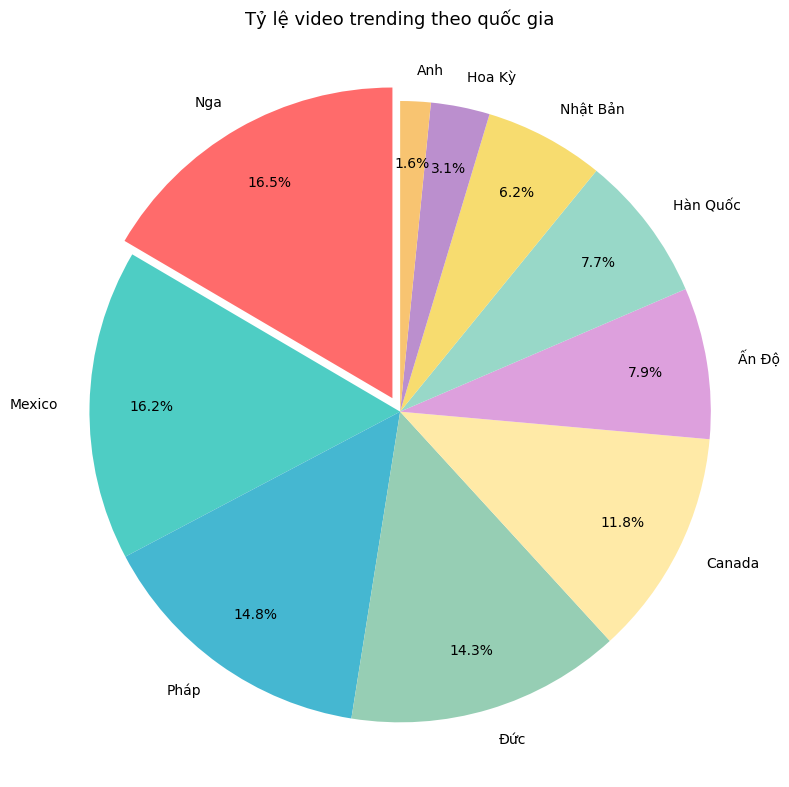

Tổng: 207,148 video

Nga: 34,282 video (16.5%)
Mexico: 33,513 video (16.2%)
Pháp: 30,581 video (14.8%)
Đức: 29,627 video (14.3%)
Canada: 24,427 video (11.8%)
Ấn Độ: 16,307 video (7.9%)
Hàn Quốc: 15,876 video (7.7%)
Nhật Bản: 12,912 video (6.2%)
Hoa Kỳ: 6,351 video (3.1%)
Anh: 3,272 video (1.6%)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

codes = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
names = {
    'US': 'Hoa Kỳ', 'CA': 'Canada', 'DE': 'Đức', 'FR': 'Pháp',
    'GB': 'Anh', 'IN': 'Ấn Độ', 'JP': 'Nhật Bản',
    'KR': 'Hàn Quốc', 'MX': 'Mexico', 'RU': 'Nga'
}

# Lấy số lượng video mỗi nước
counts = {}
for c in codes:
    if c in dataframes:
        counts[c] = len(dataframes[c])

# Tổng tất cả video
s = sum(counts.values())

# Dữ liệu để vẽ
data = []
for c in sorted(counts, key=counts.get, reverse=True):
    data.append({
        'code': c,
        'name': names[c],
        'count': counts[c],
        'pct': counts[c] / s * 100
    })

# Đưa vào DataFrame
df = pd.DataFrame(data)

# Gán mã màu
cols = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7',
        '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#F8C471']

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['count'], 
        labels=df['name'],
        colors=cols[:len(df)],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.8,
        explode=[0.05] + [0]* (len(df) - 1))
plt.title('Tỷ lệ video trending theo quốc gia', fontsize=13)
plt.axis('equal')
plt.tight_layout()
plt.show()

# In kết quả
print(f"Tổng: {s:,} video\n")
for row in df.itertuples():
    print(f"{row.name}: {row.count:,} video ({row.pct:.1f}%)")

## Nhận xét từ biểu đồ phân bố video trending theo quốc gia

### 1. Tổng thể xu hướng
Biểu đồ cho thấy **Nga** và **Mexico** dẫn đầu về số lượng video trending với tỷ lệ lần lượt là **16.5%** và **16.2%**. Điều này phản ánh hoạt động sôi nổi của cộng đồng người dùng và tính đa dạng của nội dung trên nền tảng YouTube tại các thị trường này.

---

### 2. Sự phân hóa rõ rệt theo quốc gia

**Nhóm dẫn đầu:**
- **Nga (16.5%)** và **Mexico (16.2%)** chiếm ưu thế tuyệt đối, có thể do:
    - Tăng trưởng mạnh trong sản xuất nội dung số
    - Cộng đồng người dùng tích cực tương tác
    - Thuật toán khuyến khích nội dung địa phương

**Sự tương phản bất ngờ:**
- **Hoa Kỳ** chỉ đạt **3.1%** và **Anh** **1.6%** - thấp đáng kể so với kỳ vọng
- Nguyên nhân có thể là:
    - Thuật toán phân bổ trending khác biệt theo khu vực
    - Sự cạnh tranh khốc liệt trong thị trường nội dung trưởng thành
    - Người dùng phân tán qua nhiều nền tảng khác

---

### 3. Phân tích theo vùng địa lý

**Châu Âu thống trị:**
- **Nga (16.5%)**, **Pháp (14.8%)**, **Đức (14.3%)** đều trong top 4
- Tổng cộng chiếm **45.6%** tổng số video trending
- Cho thấy sự phát triển mạnh mẽ của nền kinh tế số châu Âu

**Bắc Mỹ có sự phân cực:**
- **Canada (11.8%)** vs **Hoa Kỳ (3.1%)**
- Phản ánh sự khác biệt trong chính sách nội dung hoặc hành vi người dùng

**Châu Á đa dạng:**
- **Ấn Độ (7.9%)**, **Hàn Quốc (7.7%)**, **Nhật Bản (6.2%)**
- Mỗi quốc gia có đặc thù riêng về văn hóa nội dung số



## **Trần Phan Minh Tiến**
### **Question 2**: Vẽ biểu đồ cột so sánh lượt thích, không thích, lượt xem và bình luận trung bình của các video thịnh hành.


[US]
Số video: 6,351
Lượt xem TB: 758,210
Lượt thích TB: 34,494
Lượt không thích TB: 1,427
Lượt bình luận TB: 4,502

[CA]
Số video: 24,427
Lượt xem TB: 486,052
Lượt thích TB: 18,398
Lượt không thích TB: 743
Lượt bình luận TB: 2,596

[DE]
Số video: 29,627
Lượt xem TB: 322,728
Lượt thích TB: 12,133
Lượt không thích TB: 667
Lượt bình luận TB: 1,653

[FR]
Số video: 30,581
Lượt xem TB: 238,752
Lượt thích TB: 9,348
Lượt không thích TB: 385
Lượt bình luận TB: 1,077

[GB]
Số video: 3,272
Lượt xem TB: 1,292,004
Lượt thích TB: 54,319
Lượt không thích TB: 2,347
Lượt bình luận TB: 6,377

[IN]
Số video: 16,307
Lượt xem TB: 397,776
Lượt thích TB: 10,480
Lượt không thích TB: 575
Lượt bình luận TB: 1,169

[JP]
Số video: 12,912
Lượt xem TB: 193,007
Lượt thích TB: 6,378
Lượt không thích TB: 250
Lượt bình luận TB: 884

[KR]
Số video: 15,876
Lượt xem TB: 243,674
Lượt thích TB: 7,552
Lượt không thích TB: 278
Lượt bình luận TB: 1,250

[MX]
Số video: 33,513
Lượt xem TB: 187,450
Lượt thích TB: 9,748
Lượt khô

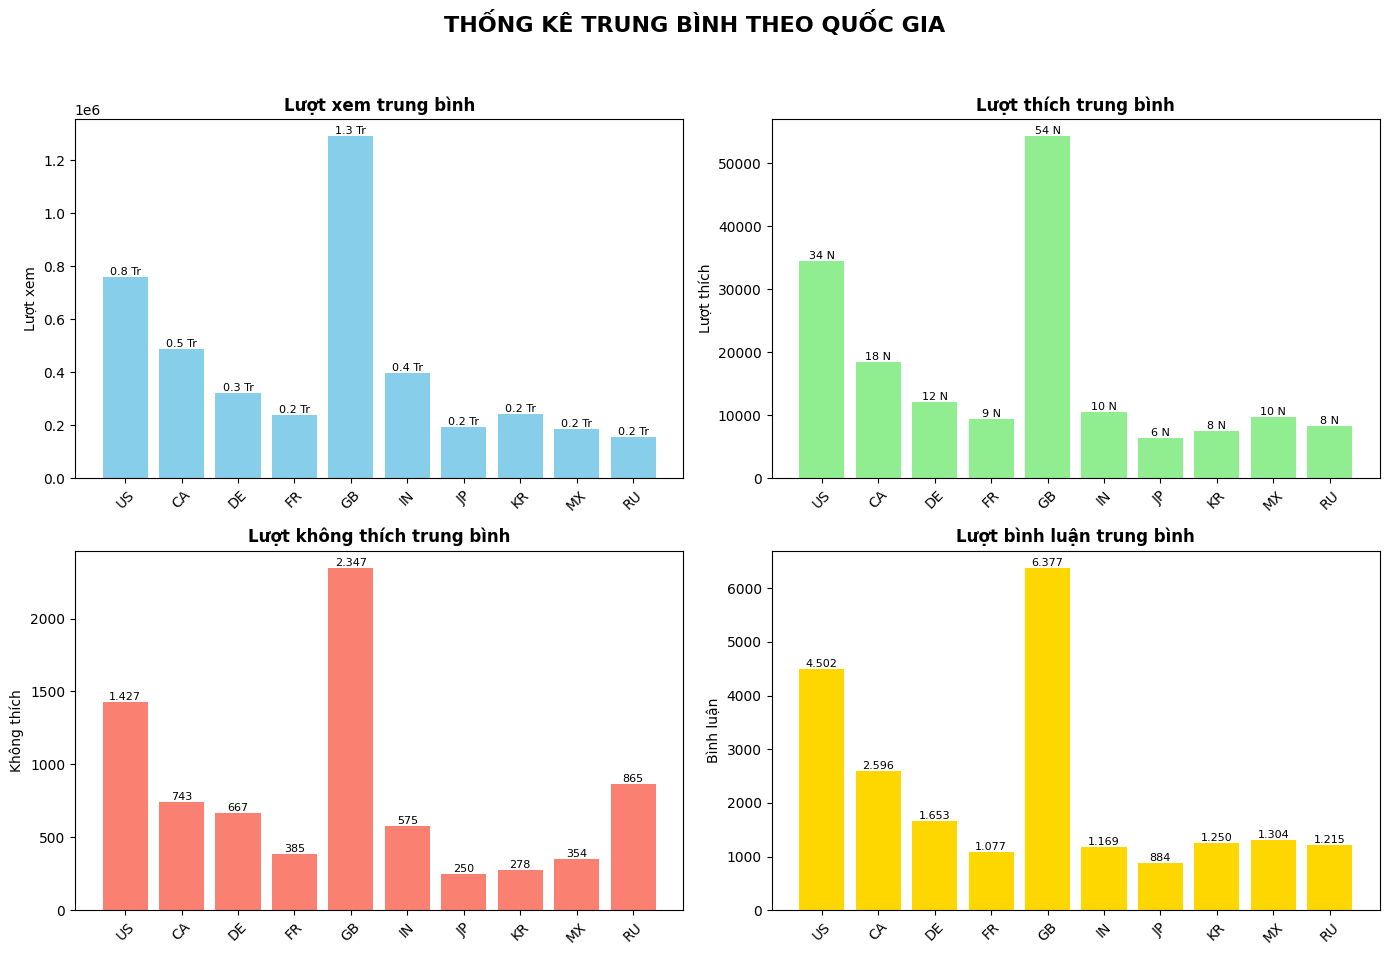

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette('husl')

# Quốc gia cần phân tích
countries = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']

# Tổng hợp dữ liệu
summary = []

for country in countries:
    df = dataframes[country]
    avg_views = df['views'].mean()
    avg_likes = df['likes'].mean()
    avg_dislikes = df['dislikes'].mean()
    avg_comments = df['comment_count'].mean()
    total_videos = len(df)

    print(f"\n[{country}]")
    print(f"Số video: {total_videos:,}")
    print(f"Lượt xem TB: {avg_views:,.0f}")
    print(f"Lượt thích TB: {avg_likes:,.0f}")
    print(f"Lượt không thích TB: {avg_dislikes:,.0f}")
    print(f"Lượt bình luận TB: {avg_comments:,.0f}")

    summary.append({
        'Quốc gia': country,
        'Lượt xem TB': avg_views,
        'Lượt thích TB': avg_likes,
        'Lượt không thích TB': avg_dislikes,
        'Lượt bình luận TB': avg_comments,
        'Số video': total_videos
    })

# Tạo DataFrame tổng hợp
df_summary = pd.DataFrame(summary)

# Hiển thị bảng số liệu
print("\n" + "="*50)
print("BẢNG SỐ LIỆU TRUNG BÌNH THEO QUỐC GIA")
print("="*50)
print(df_summary.round(2).to_string(index=False))

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('THỐNG KÊ TRUNG BÌNH THEO QUỐC GIA', fontsize=16, fontweight='bold')

def draw(ax, col, color, title, ylabel, fmt=None):
    bars = ax.bar(df_summary['Quốc gia'], df_summary[col], color=color)
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)
    for bar in bars:
        val = bar.get_height()
        label = fmt(val) if fmt else f'{val:,.0f}'.replace(',', '.')
        ax.text(bar.get_x() + bar.get_width()/2, val, label, ha='center', va='bottom', fontsize=8)

# Vẽ các biểu đồ với nhãn tiếng Việt
draw(axes[0, 0], 'Lượt xem TB', 'skyblue', 'Lượt xem trung bình', 'Lượt xem', lambda x: f'{x/1e6:.1f} Tr')
draw(axes[0, 1], 'Lượt thích TB', 'lightgreen', 'Lượt thích trung bình', 'Lượt thích', lambda x: f'{x/1e3:.0f} N')
draw(axes[1, 0], 'Lượt không thích TB', 'salmon', 'Lượt không thích trung bình', 'Không thích')
draw(axes[1, 1], 'Lượt bình luận TB', 'gold', 'Lượt bình luận trung bình', 'Bình luận')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Chừa chỗ cho tiêu đề
plt.show()


## Tổng quan

Biểu đồ cho thấy mức độ tương tác với video trending khá khác biệt giữa các quốc gia. Anh và Mỹ nổi bật với lượt xem, lượt thích và bình luận cao – cho thấy người dùng tại đây rất tích cực tương tác.
## So sánh giữa các quốc gia

- Anh dẫn đầu về lượt xem (1.3 triệu) và bình luận, phản ánh sức hút mạnh của nội dung tại đây.

- Mỹ theo sát với lượt thích và bình luận cao, chứng tỏ cộng đồng người dùng năng động.

- Ấn Độ có lượt không thích cao nhất – có thể do nội dung gây tranh cãi nhiều hơn.

- Nhật, Hàn, Pháp có lượng tương tác khá thấp, có thể do thói quen ít like/bình luận của người xem.

## Theo vùng địa lý

Châu Âu nổi bật với nhiều quốc gia có mức tương tác tốt.

Bắc Mỹ phân hóa rõ: Mỹ rất cao, Canada trung bình.

Châu Á cho thấy sự đa dạng: Ấn Độ mạnh về số liệu, Nhật và Hàn trầm lặng hơn.

## Kết luận

Mỗi quốc gia có phong cách tiêu dùng nội dung khác nhau. Điều này tạo nên bức tranh phong phú cho YouTube toàn cầu và là gợi ý tốt cho các nhà sáng tạo khi muốn mở rộng tầm ảnh hưởng.

## **Trần Minh Thuận**

### **Question 3**: Top 7 kênh YouTube có số lượng video thịnh hành nhiều nhất trên toàn cầu

Phân tích để nhận diện những nhà sáng tạo/kênh có khả năng tạo ra nội dung trending một cách nhất quán và hiệu quả nhất.


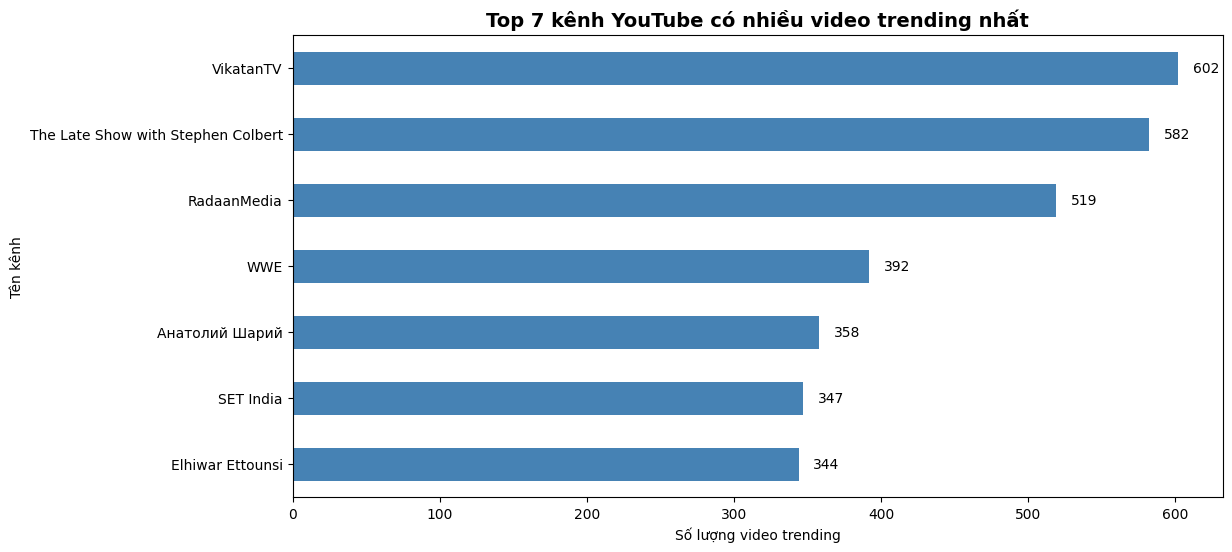

In [55]:
# Top 5 kênh có nhiều video trending nhất
top_channels = combined_df['channel_title'].value_counts().head(7)

plt.figure(figsize=(12, 6))
# [::-1] để đảo ngược thứ tự cột trong biểu đồ ngang
top_channels[::-1].plot(kind='barh', color='steelblue')

for i, v in enumerate(top_channels[::-1]):
    plt.text(v + 10, i, f'{v:,}', color='black', va='center', fontsize=10)

plt.title('Top 7 kênh YouTube có nhiều video trending nhất', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng video trending')
plt.ylabel('Tên kênh')
plt.show()


### Nhận xét về Top 7 Kênh YouTube có nhiều video trending nhất:

**Phân bố dữ liệu:**

Danh sách top 7 kênh cho thấy sự đa dạng về nguồn gốc và loại nội dung:

1.  **VikatanTV** (Ấn Độ): Kênh tin tức và giải trí bằng tiếng Tamil.
2.  **The Late Show with Stephen Colbert** (Mỹ): Chương trình talkshow đêm khuya nổi tiếng.
3.  **RadaanMedia** (Ấn Độ): Công ty sản xuất nội dung giải trí Nam Ấn.
4.  **WWE** (Mỹ): Kênh thể thao giải trí đấu vật chuyên nghiệp.
5.  **Ahatornn Wapnn** (Thái Lan): Kênh giải trí hoặc tin tức tổng hợp.
6.  **SET India** (Ấn Độ): Kênh giải trí tổng hợp hàng đầu Ấn Độ.
7.  **Elhiwar Ettounsi** (Tunisia): Kênh truyền hình tư nhân nổi tiếng của Tunisia, bao gồm tin tức và giải trí.

*   **Ấn Độ thống trị:** Có đến 3 kênh trong top 7 (VikatanTV, RadaanMedia, SET India), cho thấy thị trường nội dung Ấn Độ rất sôi động và có khả năng tạo xu hướng cao.
*   **Mỹ vẫn có sức ảnh hưởng:** Với 2 kênh lớn là The Late Show và WWE, Mỹ cho thấy thế mạnh ở các chương trình talkshow và thể thao giải trí có lượng fan trung thành lớn.
*   **Sự hiện diện của các quốc gia khác:** Thái Lan và Tunisia cũng góp mặt, cho thấy nội dung địa phương hóa mạnh mẽ cũng có thể đạt được lượng video trending lớn.

**Nguyên do các kênh này có nhiều video trending:**

1.  **Nội dung chất lượng cao và nhất quán:**
    *   Các kênh này thường xuyên sản xuất nội dung được đầu tư kỹ lưỡng, từ kịch bản, quay phim đến hậu kỳ.
    *   Lịch đăng video đều đặn giúp giữ chân khán giả và tạo thói quen theo dõi.

2.  **Hiểu rõ đối tượng khán giả:**
    *   Họ tạo ra nội dung đánh trúng thị hiếu và mối quan tâm của lượng lớn khán giả mục tiêu.
    *   Ví dụ: VikatanTV và SET India phục vụ khán giả Ấn Độ với các chương trình giải trí, phim truyện, tin tức phù hợp văn hóa.

3.  **Tính thời sự và cập nhật:**
    *   Nhiều kênh (đặc biệt là tin tức và talkshow như The Late Show, Elhiwar Ettounsi, VikatanTV) nhanh chóng nắm bắt các sự kiện nóng, chủ đề đang được quan tâm để sản xuất video, thu hút lượng xem lớn trong thời gian ngắn.

4.  **Thương hiệu mạnh và cộng đồng lớn:**
    *   Các kênh như WWE, The Late Show đã có thương hiệu lâu năm và lượng người hâm mộ đông đảo trên toàn cầu. Video của họ dễ dàng được chia sẻ và lan truyền.
    *   SET India là một trong những kênh YouTube lớn nhất thế giới, có lợi thế về nguồn lực và khả năng quảng bá.

5.  **Tương tác cao:**
    *   Nội dung của họ thường kích thích sự tương tác (bình luận, thích, chia sẻ), đây là một yếu tố quan trọng để YouTube đánh giá và đưa video lên tab thịnh hành.

6.  **Đa dạng hóa nội dung (trong một số trường hợp):**
    *   Các kênh giải trí tổng hợp như SET India cung cấp nhiều loại chương trình khác nhau (phim, show truyền hình, âm nhạc), thu hút nhiều nhóm khán giả.

7.  **Tận dụng các sự kiện đặc biệt:**
    *   WWE thường có lượng video trending tăng vọt xung quanh các sự kiện lớn (pay-per-view). Các kênh tin tức cũng tương tự khi có các sự kiện quan trọng.

Nhìn chung, sự kết hợp giữa việc sản xuất nội dung chất lượng, đều đặn, phù hợp với thị hiếu khán giả, cùng với việc xây dựng thương hiệu mạnh và khả năng nắm bắt xu hướng là những yếu tố chính giúp các kênh này thống trị bảng xếp hạng video thịnh hành.


## **Trần Minh Thuận**

### **Question 4**: Vẽ biểu đồ thể hiện thể loại nội dung được ưa chuộng của từng quốc gia

Phân tích phân phối các thể loại video giữa các quốc gia để thấy rõ sự khác biệt trong xu hướng nội dung và sự tương đồng giữa các khu vực. Phân tích này sử dụng thông tin từ tiêu đề video để phân loại nội dung.


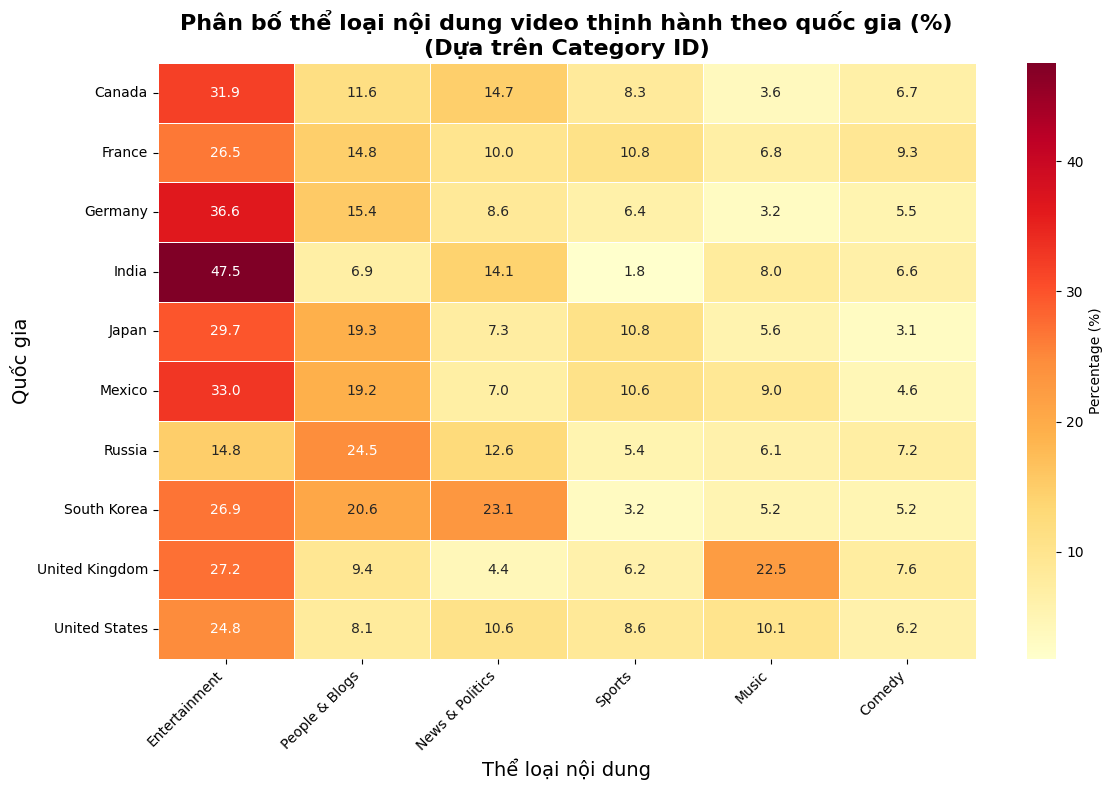

In [56]:
# Create a mapping of category_id to category names
# http://stackoverflow.com/questions/17698040/ddg#35877512
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles', 
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

# Add country name to combined_df for analysis
combined_df['country_code'] = ''
for country_code, df_country in dataframes.items():
    mask = combined_df['video_id'].isin(df_country['video_id'])
    combined_df.loc[mask, 'country_code'] = country_code

# Map country codes to country names
combined_df['country_name'] = combined_df['country_code'].map(country_names)

# Map category_id to category names
combined_df['category_name'] = combined_df['category_id'].map(category_mapping)

# Handle any unmapped categories
combined_df['category_name'] = combined_df['category_name'].fillna('Other')

# Create cross-tabulation of country vs category
content_by_country = pd.crosstab(combined_df['country_name'], combined_df['category_name'])

# Calculate percentage distribution for fair comparison between countries
content_pct = content_by_country.div(content_by_country.sum(axis=1), axis=0) * 100

# Select top categories to avoid overcrowding the heatmap
top_categories = content_by_country.sum().nlargest(6).index
content_pct_filtered = content_pct[top_categories]

# Create heatmap showing percentage distribution of content by country
plt.figure(figsize=(12, 8))
sns.heatmap(content_pct_filtered, annot=True, fmt='.1f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.title('Phân bố thể loại nội dung video thịnh hành theo quốc gia (%)\n(Dựa trên Category ID)', 
          fontsize=16, fontweight='bold')
plt.ylabel('Quốc gia', fontsize=14)
plt.xlabel('Thể loại nội dung', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Nhận xét từ biểu đồ heatmap phân bố nội dung:

Dựa trên phân tích 207,148 video từ 10 quốc gia với 18 thể loại khác nhau, ta có những phát hiện:

#### **1. Xu hướng toàn cầu**
- **Entertainment** là thể loại thống trị (29.2% tổng số video), phổ biến ở hầu hết các quốc gia
- **People & Blogs** đứng thứ 2 (17.1%), cho thấy xu hướng cá nhân hóa nội dung mạnh mẽ
- **News & Politics** chiếm 11.3%, phản ánh nhu cầu thông tin cao của người xem

#### **2. Đặc trưng riêng biệt theo vùng**

**Nhóm châu Á:**
- **Ấn Độ**: Nổi bật với Entertainment cao nhất (47.5%), cho thấy nhu cầu giải trí lớn, dân số lớn và thị phần giải trí cao cũng giải thích một phần cho lí do ấn độ thống lĩnh trong việc có các kênh sở hữu nhiều video trending ở câu hỏi số 3
- **Hàn Quốc**: Cân bằng giữa Entertainment (26.9%) và News & Politics (23.1%), phản ánh quan tâm chính trị cao
- **Nhật Bản**: Tập trung Entertainment (29.7%) và People & Blogs (19.3%)

**Nhóm châu Âu:**
- **Đức**: Dẫn đầu về Entertainment (36.6%) và People & Blogs (15.4%)
- **Pháp**: Cân bằng giữa Entertainment (26.5%), People & Blogs (14.8%) và Sports (10.8%)
- **Anh**: Đặc biệt với Music cao (22.5%), chỉ sau Entertainment (27.2%)

**Nhóm Bắc Mỹ:**
- **Canada**: Phân bố đều với Entertainment (31.9%) và quan tâm tin tức cao (14.7%)
- **Mỹ**: Cân bằng Entertainment (24.8%), News & Politics (10.6%) và Music (10.1%)

**Nhóm đặc biệt:**
- **Nga**: Duy nhất có People & Blogs dẫn đầu (24.5%), cho thấy văn hóa chia sẻ cá nhân mạnh
- **Mexico**: Entertainment cao (33.0%) với People & Blogs phát triển (19.2%)

#### **3. Insights chiến lược cho content creator**

**Thị trường toàn cầu**: Tập trung vào Entertainment và People & Blogs để có độ bao phủ rộng nhất

**Thị trường từng khu vực**:
- **Châu Á**: Đầu tư vào Entertainment chất lượng cao
- **Châu Âu**: Kết hợp Entertainment với Sports và Music  
- **Bắc Mỹ**: Cân bằng giữa giải trí và thông tin
- **Nga**: Tận dụng xu hướng vlog/personal content mạnh mẽ

Sự đa dạng này phản ánh khác biệt văn hóa sâu sắc và mở ra cơ hội tối ưu nội dung theo từng thị trường cụ thể.

##### Hoàng Văn Đức

    Question 5: Vẽ biểu đồ cột thể hiện số lượng video thịnh hành theo giờ đăng trong ngày tại Hoa Kỳ

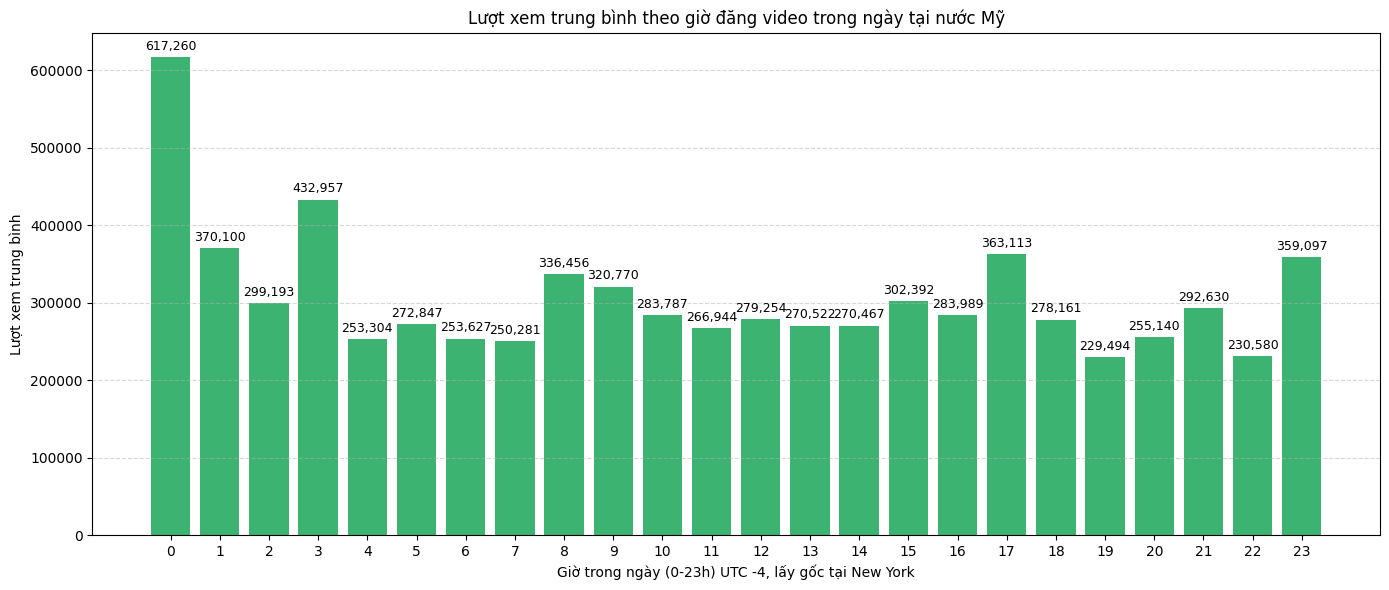

In [57]:
import pytz

def luot_xem_theo_gio_dia_phuong(combined_df):

    combined_df = combined_df.copy()

combined_df['publish_time'] = pd.to_datetime(combined_df['publish_time'], errors='coerce', utc=True)

# Lọc bỏ các dòng thiếu dữ liệu cần thiết
df_analysis = combined_df.dropna(subset=['publish_time', 'views']).copy()

Tay = pytz.timezone('America/New_York')
df_analysis['publish_hour'] = df_analysis['publish_time'].dt.tz_convert(Tay)

df_analysis['publish_hour'] = df_analysis['publish_hour'].dt.hour

# Nhóm theo giờ và tính trung bình lượt xem
views_by_hour = df_analysis.groupby('publish_hour')['views'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
bars = plt.bar(views_by_hour['publish_hour'], views_by_hour['views'], color='mediumseagreen')

# Thêm số liệu cụ thể trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # dịch lên trên
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Giao diện biểu đồ
plt.xticks(range(0, 24))  # đảm bảo đủ 24 giờ
plt.title('Lượt xem trung bình theo giờ đăng video trong ngày tại nước Mỹ')
plt.xlabel('Giờ trong ngày (0-23h) UTC -4, lấy gốc tại New York')
plt.ylabel('Lượt xem trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


luot_xem_theo_gio_dia_phuong(dataframes["US"])

## Lượt xem cao nhất xảy ra vào lúc 0 hoặc 3 giờ sáng trong ngày với cao nhất 617 nghìn lượt.
## Lượt xem thấp nhất xảy ra vào lúc 19 giờ tối với hơn 229 nghìn lượt.


### Lý do là do thuật toán YouTube sẽ phân phối video theo mức độ tương tác ban đầu (đặc biệt là lượt xem và giữ chân người xem).
### Vào lúc 0h, 3h sáng, video được phân phối nhiều hơn do:

### - Khách quan: Đây là thời điểm có nhiều người rảnh, chuẩn bị đi ngủ. Người dùng có xu hướng giải trí cao vào buổi khuya (xem phim, TikTok, YouTube,...). Đặc biệt ở Mỹ, nhiều người có thói quen ngủ muộn.

### - Chủ quan: cạnh tranh thấp do ít kênh đăng cùng thời điểm -> thuật toán YouTube đánh giá video là “có tiềm năng xu hướng” -> được phân phối mạnh hơn nên người dùng tiếp cận đến video nhiều hơn → tạo hiệu ứng domino.

## - Để chứng minh nó là quan điểm thực tế: Các nghệ sĩ nổi tiếng họ thường đăng video lúc 0h phần lớn vì lý do trên và cũng phần do 0h là lúc cảm giác thời gian giao thừa ngày cũ và ngày mới -> tạo cảm giác trang trọng cho các video âm nhạc, blog chính thống. vd: Bài hát mới của Justin , bài hát mới của Ariana Grande, bài hát mới của Taylor Swift đều phát hành lúc 0h.
## - Điều này còn đúng khi áp dụng tại Việt Nam nhưng em sẽ không kể thêm quá nhiều

### Ngược lại, lúc 19h sáng, người dùng vẫn có phần nhiều rảnh nhưng vì giờ phải cạnh tranh với các video đăng cùng thời điểm ->Nếu video không có tín hiệu tốt trong 1–2 giờ đầu → thuật toán YT hiểu là video không hấp dẫn → phân phối kém → lượt xem thấp.


## => Gợi ý hướng phát triển để tăng lượt xem:
### Chọn khung giờ tối ưu để đăng video (5h–6h sáng hoặc 11h-0h -> không quá sớm và không quá muộn):

### Đăng trước giờ cao điểm để video có thời gian tích lũy tín hiệu tốt, cũng như duy trì thời gian đăng đó để người dùng quen với lịch trình của kênh.

## Ngoài ra, cần:
### tạo thumbnail và tiêu đề hấp dẫn ngay từ đầu:
### từ đó, tạo thói quen cho người xem, giúp YouTube dễ phân phối hơn.

# Youtube thực tế chính là định luật "núm vú giả" mà các giới Tài Phiệt luôn nói về. Tạo nhu cầu giải trí cực lớn cho tầng lớp "bình thường". Giải trí càng mạnh, người xem càng bị cuốn vào -> người xem bị lười hơn -> khả năng tập trung làm việc kém hiệu quả hơn -> thu nhập họ thấp hơn -> người giàu thì vẫn giữ được vị thế tiền bạc
 Nguồn: https://www.youtube.com/watch?v=uS-AQkL6aQ4.

##### **Hoàng Văn Đức**

    Question 6: Vẽ biểu đồ đường hoặc cột thể hiện lượt xem trung bình theo từng ngày trong tuần

Trump: 44 video — Avg views: 224,211
Iphone: 21 video — Avg views: 819,431
Logan Paul: 1 video — Avg views: 430,321
Fortnite: 4 video — Avg views: 713,414


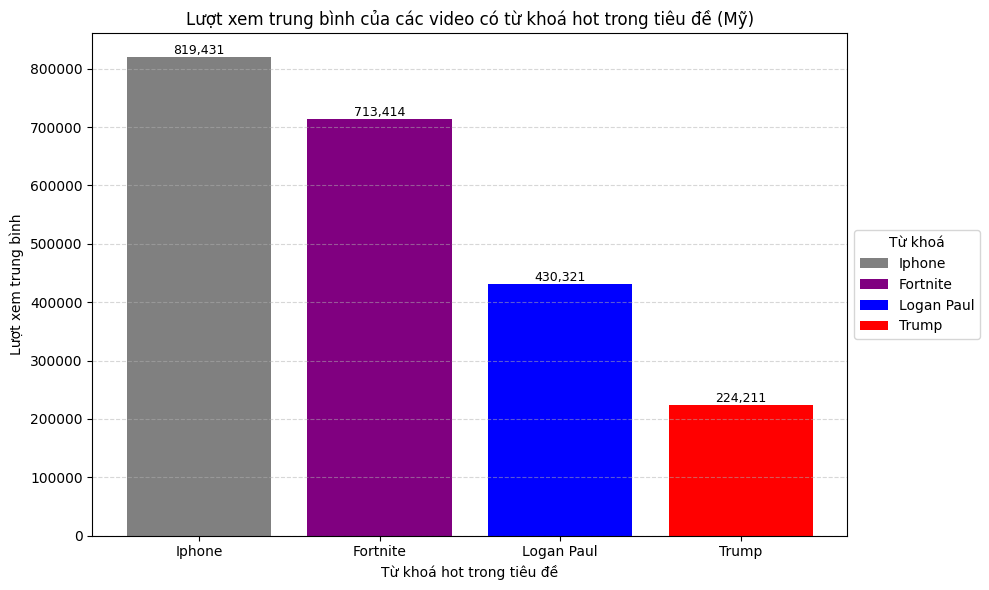

In [58]:
df_us = combined_df[combined_df['country_code'] == 'US'].copy()

# Chuyển tiêu đề thành chữ thường để dễ tìm từ khoá
df_us['title_lower'] = df_us['title'].str.lower()

# Danh sách từ khoá hot (năm 2017–2018)
hot_keywords = ['trump', 'iphone', 'logan paul', 'fortnite']

# Tạo cột mới cho từng từ khoá: True/False nếu xuất hiện trong title
for kw in hot_keywords:
    col_name = f'has_{kw.replace(" ", "_")}'
    df_us[col_name] = df_us['title_lower'].str.contains(kw)

# Tính lượt xem trung bình với từng từ khoá
views_data = []
for kw in hot_keywords:
    col = f'has_{kw.replace(" ", "_")}'
    count = df_us[col].sum()
    if count > 0:
        avg_views = df_us[df_us[col]]['views'].mean()
        views_data.append({'keyword': kw.title(), 'avg_views': avg_views})
        print(f'{kw.title()}: {count} video — Avg views: {avg_views:,.0f}')
    else:
        print(f'{kw.title()}: 0 video')
        # Đưa vào DataFrame để vẽ
df_keywords = pd.DataFrame(views_data)
# Bỏ những keyword không có video nào (NaN)
df_keywords = df_keywords.dropna(subset=['avg_views'])

# Sắp xếp DataFrame theo 'avg_views' giảm dần
df_keywords = df_keywords.sort_values(by='avg_views', ascending=False)

# Gán màu riêng cho từng từ khoá
colors = {
    'Trump': 'red',
    'Iphone': 'gray',
    'Logan Paul': 'blue',
    'Fortnite': 'purple'
}

# Vẽ biểu đồ với màu riêng
plt.figure(figsize=(10, 6))
bars = []
for kw in df_keywords['keyword']: # Iterate in the new sorted order
    color = colors.get(kw, 'grey') # Use .get for safety if a keyword is not in colors
    avg_view = df_keywords[df_keywords['keyword'] == kw]['avg_views'].values[0]
    bar = plt.bar(kw, avg_view, color=color, label=kw)
    bars.append(bar)

# Thêm số liệu trên từng cột
for bar_group in bars: # bars is a list of lists of bars
    for b in bar_group:
        height = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, height,
                 f'{height:,.0f}', ha='center', va='bottom', fontsize=9)

# Thêm tiêu đề và nhãn trục
plt.title('Lượt xem trung bình của các video có từ khoá hot trong tiêu đề (Mỹ)')
plt.xlabel('Từ khoá hot trong tiêu đề')
plt.ylabel('Lượt xem trung bình')

# Thêm chú thích (legend)
plt.legend(title='Từ khoá', loc='center left', bbox_to_anchor=(1, 0.5))


plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Các từ khoá trên là những sự kiện lớn ở Mỹ tại thời điểm 2017-2018.

### Trong các video tại Mỹ giai đoạn 2017–2018, tiêu đề có từ khóa "Iphone" đạt lượt xem trung bình cao nhất (819,431), tiếp theo là "Fortnite" (713,414).
### Ngược lại, từ khóa "Trump" dù phổ biến nhưng có mức lượt xem trung bình thấp hơn đáng kể (224,211). Điều này cho thấy từ khóa công nghệ và giải trí có sức hút mạnh hơn so với nội dung chính trị trong tiêu đề video.

### Có vẻ người dân Mỹ có quan tâm đến các cuộc bầu cử đến chính trị nhưng điều họ thật sự quan tâm nhiều hơn là giải trí thuần tuý. Cũng giống như việc thi thoảng mọi người vẫn xem thời sự để biết thông tin khi ăn cơm. Nhưng không quá quan tâm nhiều. Xu hướng này mang tính ổn định lâu dài.

## Đề xuất cải thiện lượt xem. Nhà sáng tạo có thể sản xuất các nội dung vừa công nghệ mà có thể liên quan đến game để thu hút người xem hơn. Nhưng nếu đi đường dài, thì việc sản xuất nội dung liên quan đến thời sự vẫn khá ổn